# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# Change directory to your project folder
%cd /content/drive/MyDrive/

# Correct folder_path - Adding the leading '/'
folder_path = "/content/drive/MyDrive"      # Replace with actual file names
# Define file_names
file_names = ['synthetic_beverage_sales_data.csv']  # Replace with actual file names

# Read CSV files into a list of DataFrames
df = pd.read_csv(os.path.join(folder_path, file_names[0]), encoding='latin-1')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

/content/drive/MyDrive


## Properly Check if df is a List or a DataFrame

In [6]:
import pandas as pd

# Ensure 'df' is a list before checking its contents
if isinstance(df, list) and df:  # ✅ Check if 'df' is a non-empty list
    if isinstance(df[0], pd.DataFrame):
        df = df[0]  # Access the DataFrame within the list

# Ensure 'df' is a DataFrame before proceeding
if isinstance(df, pd.DataFrame):
    print(df.info())
    print("\n---\n")
    print(df.describe(include='all'))
    print("\n---\n")
    print("First 5 rows:\n", df.head())
    print("\n---\n")
    print("Number of unique values in each column:\n", df.nunique())
    print("\n---\n")

    # Loop through columns and print first 20 unique values
    for col in df.columns:
        unique_values = df[col].unique()[:20]  # Show first 20 unique values
        print(f'Column: {col}, Unique values: {unique_values}')
        print("-" * 50)

else:
    print("DataFrame not found or not properly loaded.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Order_ID       object        
 1   Customer_ID    object        
 2   Customer_Type  object        
 3   Product        object        
 4   Category       object        
 5   Unit_Price     float64       
 6   Quantity       int64         
 7   Discount       float64       
 8   Total_Price    float64       
 9   Region         object        
 10  Order_Date     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 755.3+ MB
None

---

       Order_ID Customer_ID Customer_Type         Product  \
count   8999910     8999910       8999910         8999910   
unique  3000000       10000             2              47   
top        ORD1     CUS4693           B2C  Hohes C Orange   
freq          5        1120       5795405          337114   
mean        NaN         NaN      

In [7]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-WÃ¼rttemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-WÃ¼rttemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-WÃ¼rttemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-WÃ¼rttemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-WÃ¼rttemberg,2023-08-23


In [8]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')

In [9]:
df.shape

(8999910, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Order_ID       object        
 1   Customer_ID    object        
 2   Customer_Type  object        
 3   Product        object        
 4   Category       object        
 5   Unit_Price     float64       
 6   Quantity       int64         
 7   Discount       float64       
 8   Total_Price    float64       
 9   Region         object        
 10  Order_Date     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 755.3+ MB


In [11]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price,Order_Date
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06,8999910
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02,2022-07-01 16:18:18.126182144
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01,2021-01-01 00:00:00
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00,2021-10-01 00:00:00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01,2022-07-02 00:00:00
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01,2023-04-01 00:00:00
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04,2023-12-30 00:00:00
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02,NaN


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # using a valid style name
sns.set_palette("husl")


# Ensure Demand is numeric
df["Total_Price"] = pd.to_numeric(df["Total_Price"], errors="coerce")

# Convert "Order_Date" to datetime format
date_col = "Order_Date"
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
else:
    raise KeyError(f"Column '{date_col}' not found in the dataset!")

# Extract Year-Month for aggregation
df["Year-Month"] = df[date_col].dt.to_period("M").astype(str)
df["Year"]= df[date_col].dt.to_period("Y").astype(str)

# Aggregate Demand by month (for overall trend)
monthly_sales = df.groupby("Year-Month")["Total_Price"].sum().reset_index()

#Aggregate by Year

# Assume df has columns "Order_Date" and "Total_Price"
date_col = "Order_Date"
df["Year"] = df[date_col].dt.to_period("Y").astype(str)

# Now you can aggregate Total_Price by year:
yearly_sales = df.groupby("Year")["Total_Price"].sum().reset_index()


monthly_category_sales = df.groupby(["Year-Month", "Category"])["Total_Price"].sum().reset_index()
yearly_category_sales = df.groupby(["Year", "Category"])["Total_Price"].sum().reset_index()
yearly_Region_Sales= df.groupby(["Year", "Region"])["Total_Price"].sum().reset_index()
monthly_Produc_Sales = df.groupby(["Year-Month", "Product"])["Total_Price"].sum().reset_index()
monthly_Customer_Sales = df.groupby(["Year-Month", "Customer_ID"])["Total_Price"].sum().reset_index()
yearly_CustomerType_sales = df.groupby(["Year", "Customer_Type"])["Total_Price"].sum().reset_index()
print(yearly_sales)

   Year   Total_Price
0  2021  3.800466e+08
1  2022  3.948598e+08
2  2023  4.017747e+08


## Monthly Sale aggregation for EDA Analysis

Available columns after renaming: ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region', 'Order_Date', 'Year-Month', 'Year']

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Order_ID       object        
 1   Customer_ID    object        
 2   Customer_Type  object        
 3   Product        object        
 4   Category       object        
 5   Unit_Price     float64       
 6   Quantity       int64         
 7   Discount       float64       
 8   Total_Price    float64       
 9   Region         object        
 10  Order_Date     datetime64[ns]
 11  Year-Month     object        
 12  Year           object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 892.6+ MB

MISSING VALUES:
Order_ID         0
Customer_ID      0
Customer

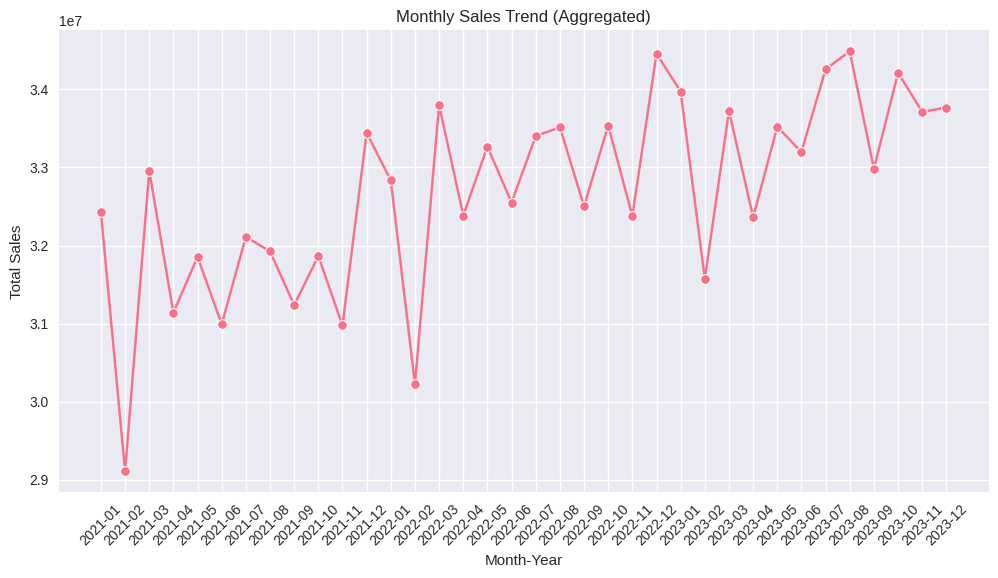

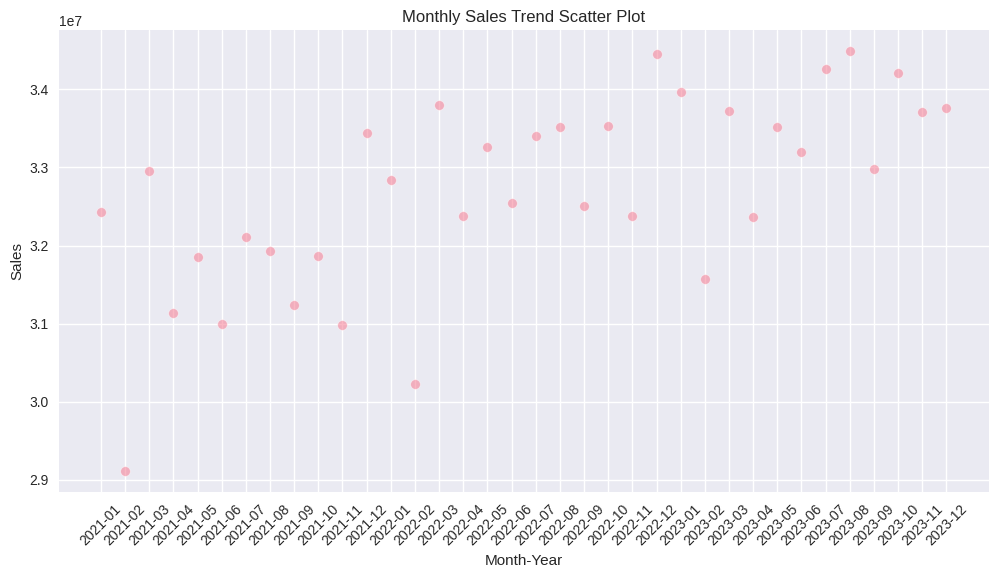

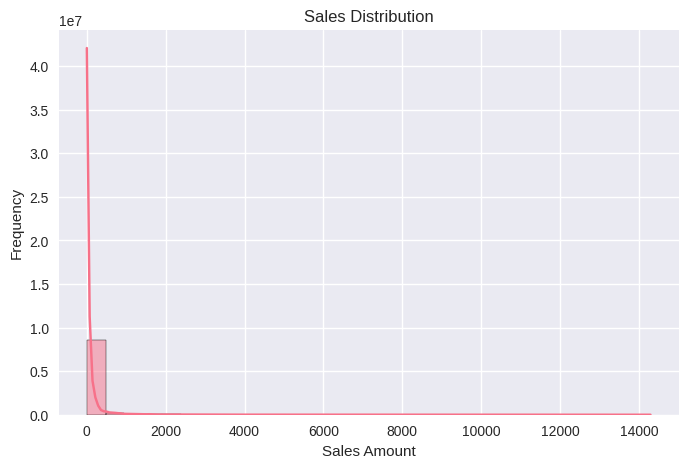

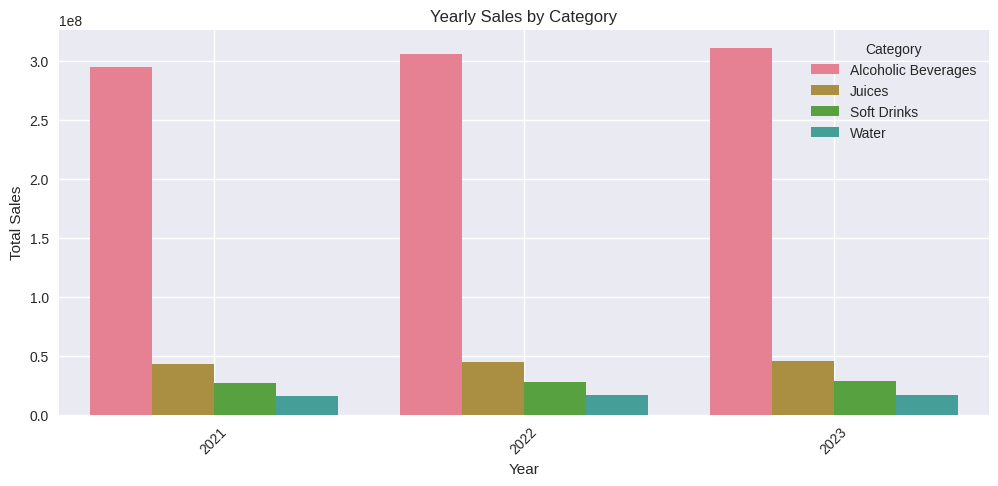

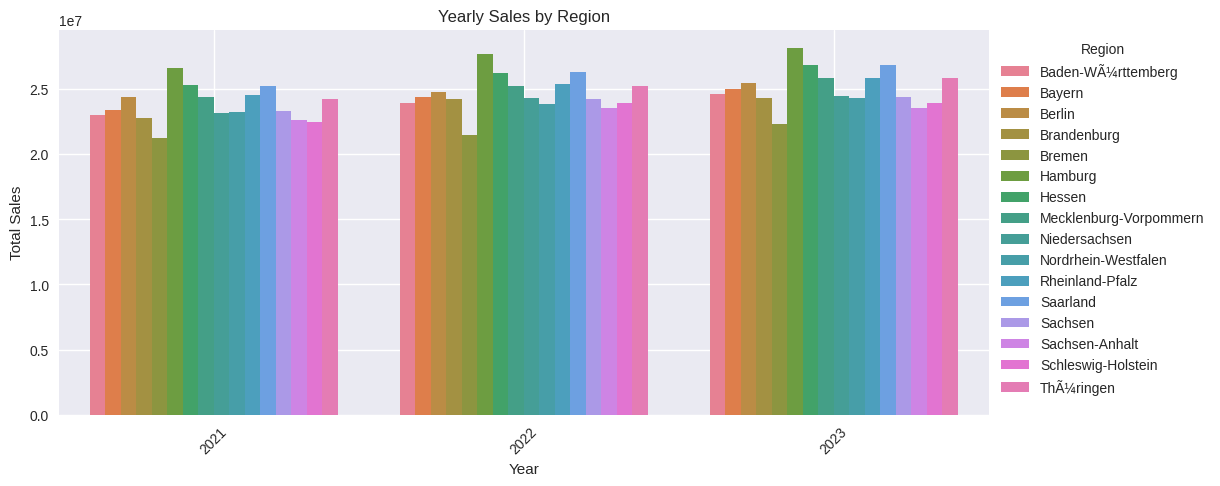

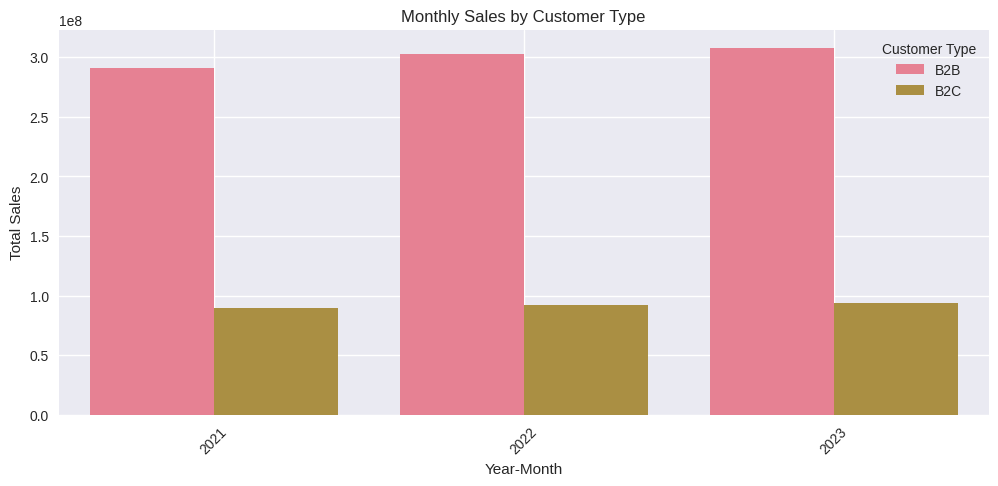

In [13]:

 #NEW: Analysis for Customer
# 1. Total Sales per customer
customer_sales = df.groupby("Customer_ID")["Total_Price"].sum().sort_values(ascending=False).reset_index()
customer_sales = customer_sales.rename(columns={"Total_Price": "Total_Sales"})  # Rename for clarity

# 2. Count of orders per customer
customer_order_count = df.groupby("Customer_ID").size().reset_index(name="order_count")

# 3. Average order value per customer
customer_analysis = pd.merge(customer_sales, customer_order_count, on="Customer_ID")
customer_analysis["avg_order_value"] = customer_analysis["Total_Sales"] / customer_analysis["order_count"]

# 4. Sort by total sales for analysis
customer_analysis = customer_analysis.sort_values("Total_Sales", ascending=False).reset_index(drop=True)

# Debug: Print columns to verify renaming
print("Available columns after renaming:", df.columns.tolist())

# Print dataset info
print("\nDATASET INFO:")
df.info()

# Print missing values
print("\nMISSING VALUES:")
print(df.isnull().sum())

# Print summary statistics
print("\nSUMMARY STATISTICS:")
print(df.describe())

# NEW: Print customer analysis summary
print("\nTOP 10 CUSTOMERS BY SALES:")
print(customer_analysis.head(10))

# Monthly Sales Trend (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Year-Month", y="Total_Price", marker="o")
plt.title("Monthly Sales Trend (Aggregated)")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter Plot: Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.scatterplot(data=monthly_sales, x="Year-Month", y="Total_Price", alpha=0.5)
plt.title("Monthly Sales Trend Scatter Plot")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Total_Price"], bins=30, kde=True)  # Assuming "Demand" is represented by "Total_Price"
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Sales by Category (Monthly Aggregation)
plt.figure(figsize=(12, 5))
sns.barplot(data=yearly_category_sales, x="Year", y="Total_Price", hue="Category")
plt.title("Yearly Sales by Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Category")
plt.show()

# Sales by 'Region' (Yearly Aggregation)
plt.figure(figsize=(12, 5))
sns.barplot(data=yearly_Region_Sales, x="Year", y="Total_Price", hue="Region")
plt.title("Yearly Sales by Region")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.show()


# Sales by customer type (Monthly Aggregation)
plt.figure(figsize=(12, 5))
sns.barplot(data=yearly_CustomerType_sales, x="Year", y="Total_Price", hue="Customer_Type")
plt.title("Monthly Sales by Customer Type")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Customer Type")
plt.show()



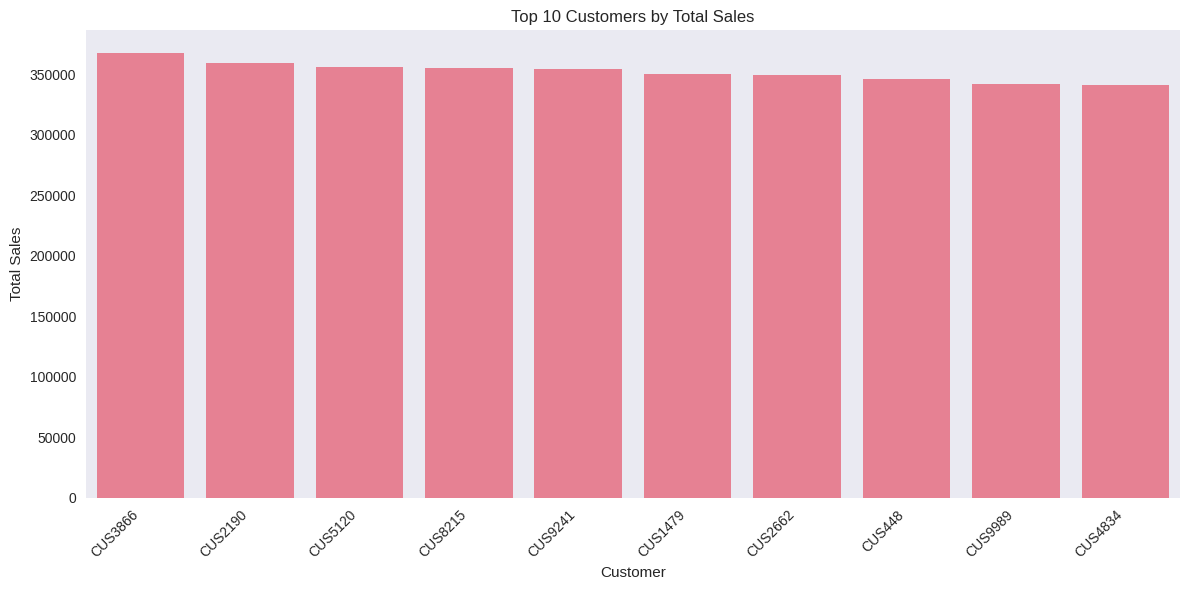

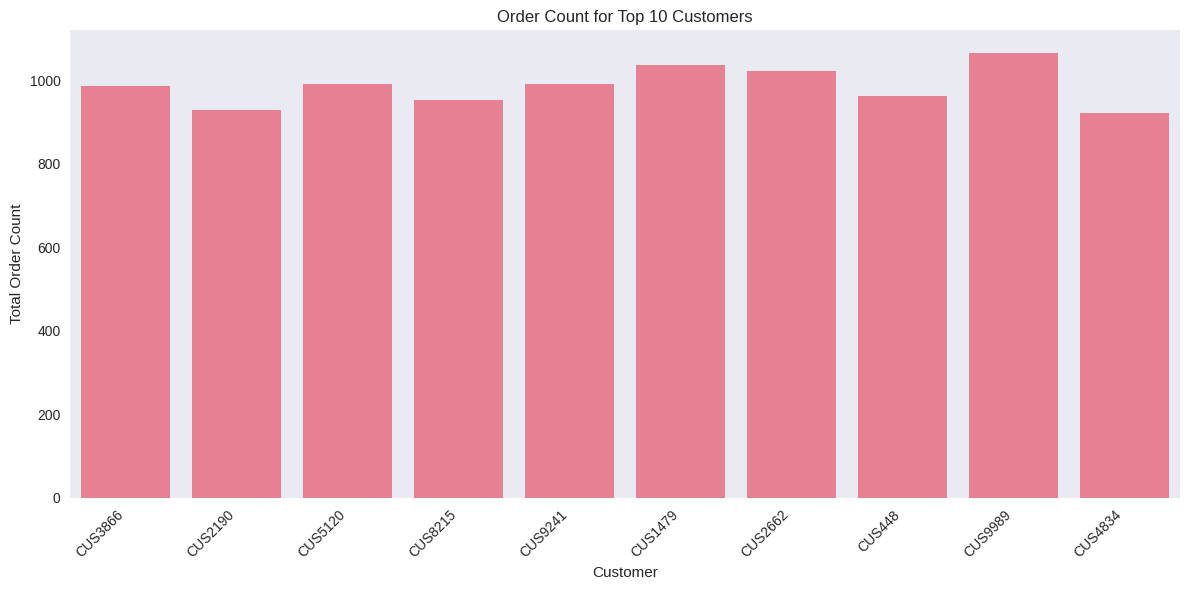

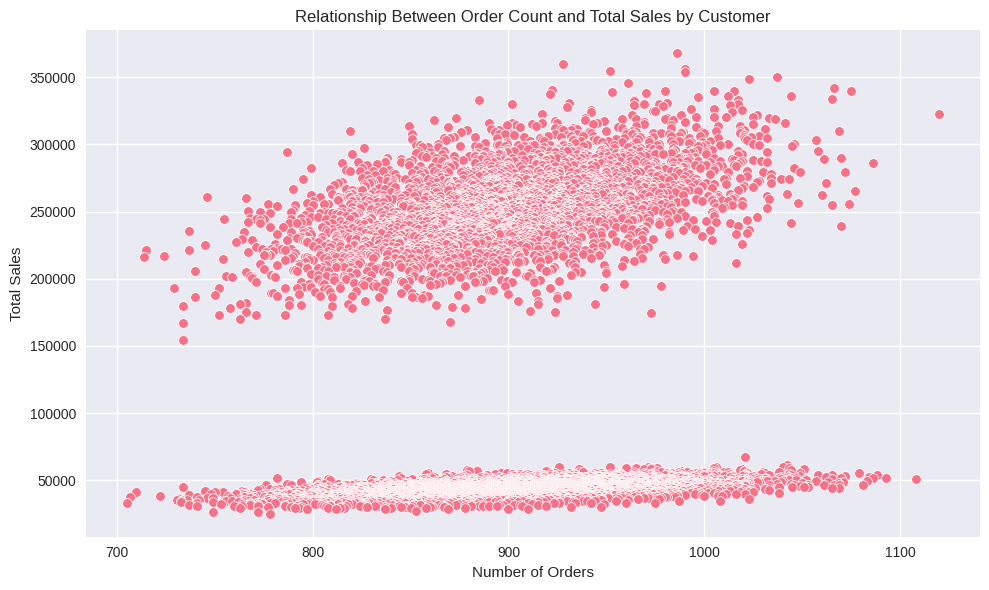

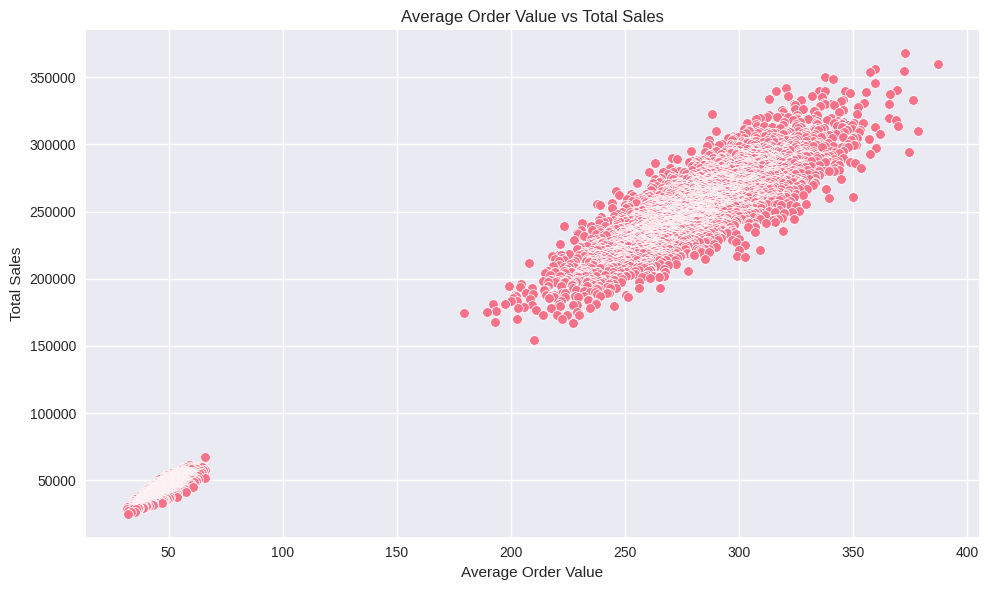

In [14]:
# Top 10 Customers by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_analysis.head(10), x="Customer_ID", y="Total_Sales")  # Use 'Customer_ID' and 'Total_Sales'
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Order Count by Customer (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_analysis.head(10), x="Customer_ID", y="order_count")  # Use 'Customer_ID' and 'order_count'
plt.title("Order Count for Top 10 Customers")
plt.xlabel("Customer")
plt.ylabel("Total Order Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# Scatter plot of Order Count vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_analysis, x="order_count", y="Total_Sales")  # Use 'order_count' and 'Total_Sales'
plt.title("Relationship Between Order Count and Total Sales by Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of Average Order Value vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_analysis, x="avg_order_value", y="Total_Sales")  # Use 'avg_order_value' and 'Total_Sales'
plt.title("Average Order Value vs Total Sales")
plt.xlabel("Average Order Value")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Identifying & dropping duplicates duplicates

In [15]:
duplicates= df[df.duplicated(subset= ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region','Order_Date'], keep='first')]

len(duplicates)

0

In [16]:
df['is_duplicate'] = df.duplicated(subset=['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region','Order_Date'], keep=False)

In [17]:
df_unique= df[df['is_duplicate']==False]

len(df_unique)

8999910

In [18]:
columns = ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region','Order_Date']


df_unique = df_unique[columns]

## Identifying and handling nulls

In [19]:
import statsmodels.formula.api as smf

# Detect missing values
missing_values = df_unique.isnull()
print("Missing Values:\n", missing_values)

Missing Values:
          Order_ID  Customer_ID  Customer_Type  Product  Category  Unit_Price  \
0           False        False          False    False     False       False   
1           False        False          False    False     False       False   
2           False        False          False    False     False       False   
3           False        False          False    False     False       False   
4           False        False          False    False     False       False   
...           ...          ...            ...      ...       ...         ...   
8999905     False        False          False    False     False       False   
8999906     False        False          False    False     False       False   
8999907     False        False          False    False     False       False   
8999908     False        False          False    False     False       False   
8999909     False        False          False    False     False       False   

         Quantity  Dis

In [20]:
df_unique.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


## Detecting outliers

In [21]:
df_unique.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')

In [22]:
# Casting data types to make proper data types
df_unique['Order_Date'] = pd.to_datetime(df_unique['Order_Date'])

In [23]:
# Aggregatomg daily data
# Assuming df is your pandas DataFrame containing the columns 'total_price' and 'order_Date'
aggregated_df= df_unique.groupby('Order_Date')['Total_Price'].sum().reset_index()

# If you want to rename the columns for clarity:
aggregated_df.columns = ['Order_Date', 'Total_Price']

# Display the result
print(aggregated_df)


     Order_Date  Total_Price
0    2021-01-01    987429.55
1    2021-01-02   1067311.95
2    2021-01-03    964076.37
3    2021-01-04   1033108.49
4    2021-01-05   1083223.79
...         ...          ...
1089 2023-12-26   1061194.29
1090 2023-12-27   1150206.36
1091 2023-12-28   1203390.15
1092 2023-12-29   1085887.49
1093 2023-12-30   1039027.36

[1094 rows x 2 columns]


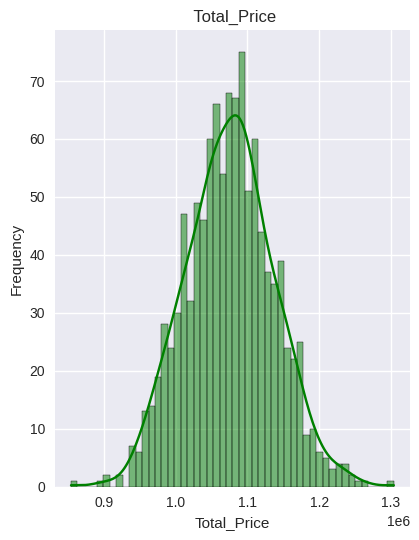

In [24]:
# Data skewness checking
plt.subplot(1, 2, 2)
sns.histplot(aggregated_df['Total_Price'], kde=True, bins=50, color='green')
plt.title(' Total_Price')
plt.xlabel('Total_Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Since data is right-skewed, the most common approach to stabilize is to use log-transformation

In [25]:
df_unique.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')

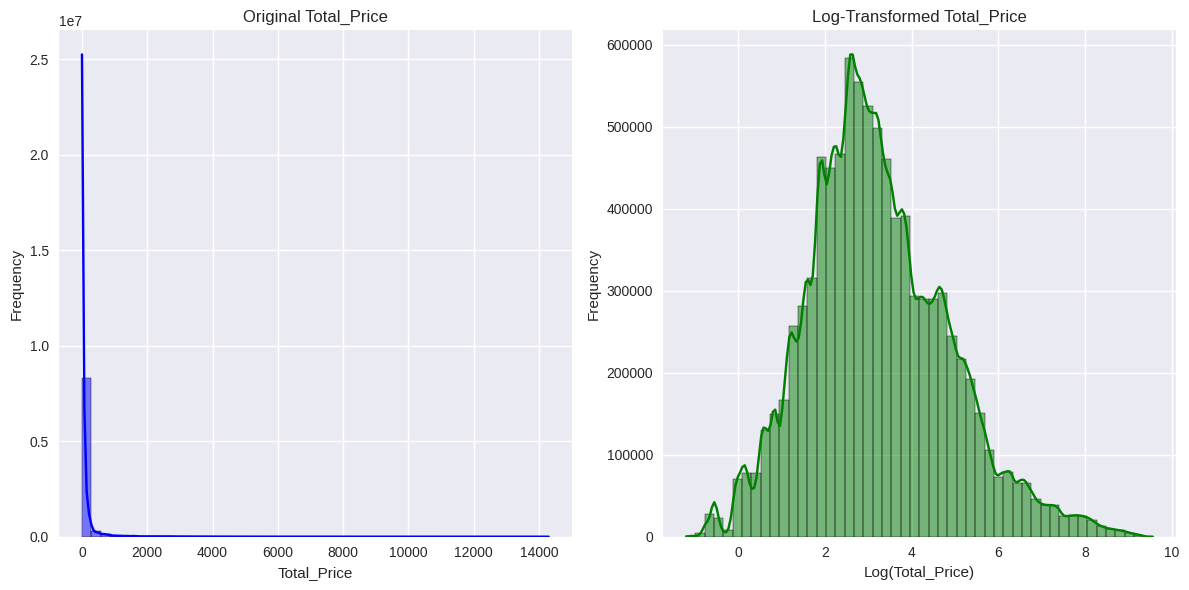

Original Total_Price Statistics:
count    8.999910e+06
mean     1.307437e+02
std      5.096947e+02
min      3.000000e-01
25%      8.400000e+00
50%      2.114000e+01
75%      6.949000e+01
max      1.429530e+04
Name: Total_Price, dtype: float64

Log-Transformed Total_Price Statistics:
count    8.999910e+06
mean     3.230033e+00
std      1.624587e+00
min     -1.203973e+00
25%      2.128232e+00
50%      3.051167e+00
75%      4.241183e+00
max      9.567686e+00
Name: Total_Price_log, dtype: float64


In [26]:

# Checking whether we have Sales_Amount column in our dataset
if 'Total_Price' not in df_unique.columns:
    raise ValueError("The 'Total_Price' column is missing in the dataset.")

# Apply log transformation
# Adding 1 to avoid log(0) which is undefined
df_unique['Total_Price_log'] = np.log(df_unique['Total_Price'] + 1)


# Replace zero or negative values with a small positive number
df_unique['Total_Price_cleaned'] = df_unique['Total_Price'].apply(lambda x: max(x, 0.001))

# Apply log transformation to the cleaned column
df_unique['Total_Price_log'] = np.log(df_unique['Total_Price_cleaned'])


# Visualize the original and transformed data
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.histplot(df_unique['Total_Price'], kde=True, bins=50, color='blue')
plt.title('Original Total_Price')
plt.xlabel('Total_Price')
plt.ylabel('Frequency')

# Transformed data
plt.subplot(1, 2, 2)
sns.histplot(df_unique['Total_Price_log'], kde=True, bins=50, color='green')
plt.title('Log-Transformed Total_Price')
plt.xlabel('Log(Total_Price)')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Descriptive statistics
print("Original Total_Price Statistics:")
print(df_unique['Total_Price'].describe())

print("\nLog-Transformed Total_Price Statistics:")
print(df_unique['Total_Price_log'].describe())

# Model Development: PROPHET: ARIMA: CHRONOS: LTSM:

## Facebook Prophet Model Development and training

In [27]:
aggregated_df.columns

Index(['Order_Date', 'Total_Price'], dtype='object')

In [28]:
df_prophet = aggregated_df.copy()

In [29]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_Date   1094 non-null   datetime64[ns]
 1   Total_Price  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [30]:
df_prophet = df_prophet.rename(columns={'Order_Date': 'ds', 'Total_Price': 'y'})

In [31]:
train_size = int(len(df_prophet) * 0.8)
train = df_prophet[:train_size]
test = df_prophet[train_size:]

In [32]:
from prophet import Prophet

# Initialize the model
model = Prophet()

# Fit the model on training data
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuro0uufk/8y0a50gs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuro0uufk/a8ttznmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52657', 'data', 'file=/tmp/tmpuro0uufk/8y0a50gs.json', 'init=/tmp/tmpuro0uufk/a8ttznmd.json', 'output', 'file=/tmp/tmpuro0uufk/prophet_modeluvn186wa/prophet_model-20250306043949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:39:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future = model.make_future_dataframe(periods=1, freq='MS')

# Generate forecast
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,1.028200e+06,9.550360e+05,1.088645e+06,1.028200e+06,1.028200e+06,-7236.733585,-7236.733585,-7236.733585,-3045.710437,-3045.710437,-3045.710437,-4191.023148,-4191.023148,-4191.023148,0.0,0.0,0.0,1.020963e+06
1,2021-01-02,1.028271e+06,9.530396e+05,1.088550e+06,1.028271e+06,1.028271e+06,-6825.725459,-6825.725459,-6825.725459,-1545.338823,-1545.338823,-1545.338823,-5280.386636,-5280.386636,-5280.386636,0.0,0.0,0.0,1.021445e+06
2,2021-01-03,1.028343e+06,9.414898e+05,1.079485e+06,1.028343e+06,1.028343e+06,-15622.233690,-15622.233690,-15622.233690,-9538.159250,-9538.159250,-9538.159250,-6084.074439,-6084.074439,-6084.074439,0.0,0.0,0.0,1.012720e+06
3,2021-01-04,1.028414e+06,9.531840e+05,1.094524e+06,1.028414e+06,1.028414e+06,-3186.767291,-3186.767291,-3186.767291,3406.479216,3406.479216,3406.479216,-6593.246507,-6593.246507,-6593.246507,0.0,0.0,0.0,1.025227e+06
4,2021-01-05,1.028485e+06,9.576439e+05,1.102035e+06,1.028485e+06,1.028485e+06,1141.932565,1141.932565,1141.932565,7946.681794,7946.681794,7946.681794,-6804.749229,-6804.749229,-6804.749229,0.0,0.0,0.0,1.029627e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2023-05-22,1.085425e+06,1.006394e+06,1.147219e+06,1.085425e+06,1.085425e+06,-8693.779216,-8693.779216,-8693.779216,3406.479216,3406.479216,3406.479216,-12100.258432,-12100.258432,-12100.258432,0.0,0.0,0.0,1.076731e+06
872,2023-05-23,1.085389e+06,1.009450e+06,1.150059e+06,1.085389e+06,1.085389e+06,-4481.735085,-4481.735085,-4481.735085,7946.681794,7946.681794,7946.681794,-12428.416879,-12428.416879,-12428.416879,0.0,0.0,0.0,1.080908e+06
873,2023-05-24,1.085353e+06,1.002689e+06,1.140371e+06,1.085353e+06,1.085353e+06,-11341.771938,-11341.771938,-11341.771938,1228.314417,1228.314417,1228.314417,-12570.086355,-12570.086355,-12570.086355,0.0,0.0,0.0,1.074012e+06
874,2023-05-25,1.085317e+06,1.002331e+06,1.146870e+06,1.085317e+06,1.085317e+06,-10975.833002,-10975.833002,-10975.833002,1547.733084,1547.733084,1547.733084,-12523.566086,-12523.566086,-12523.566086,0.0,0.0,0.0,1.074342e+06


<ipython-input-34-2c13c462711c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


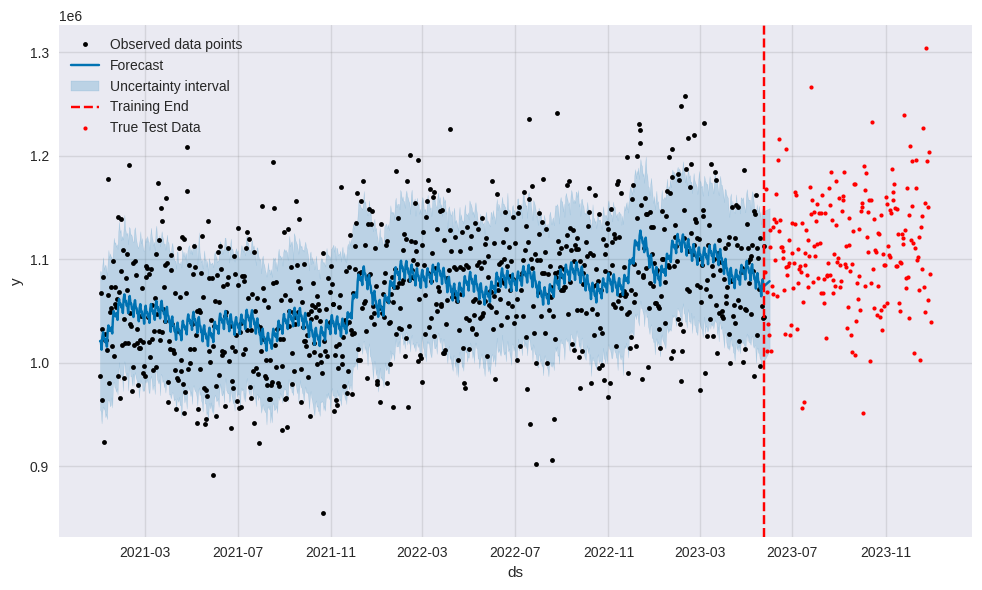

In [34]:
import matplotlib.pyplot as plt

# plot the time series
forecast_plot = model.plot(forecast)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast['ds'].iloc[-2]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
test['ds'] = pd.to_datetime(test['ds'])
plt.plot(test['ds'], test['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

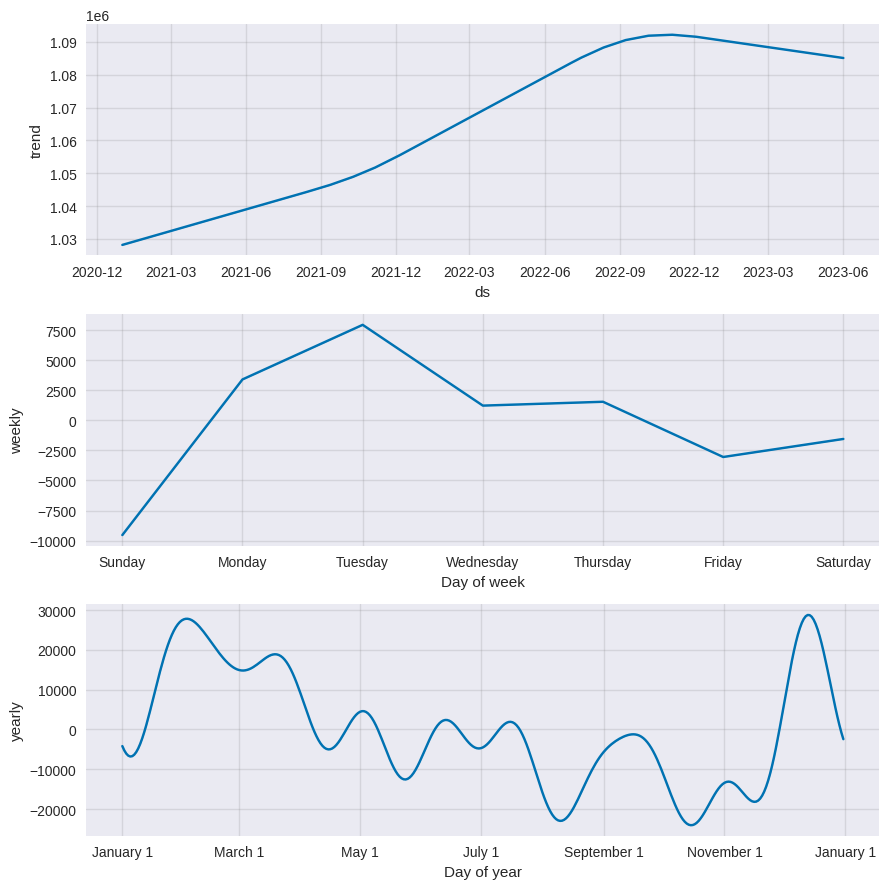

In [35]:
# Python
fig2 = model.plot_components(forecast)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_forecast = model.predict(test)

test_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
test_mse = mean_squared_error(test['y'], test_forecast['yhat'])
test_rmse = np.sqrt(test_mse)

forecast_train = forecast.iloc[:len(train)]
train_mae = mean_absolute_error(train['y'], forecast_train['yhat'])
train_mse = mean_squared_error(train['y'], forecast_train['yhat'])
train_rmse = np.sqrt(train_mse)


print(f"Test MAE: {test_mae}")
print(f"Train MAE: {train_mae}")
print("-----------------------------")
print(f"Test MSE: {test_mse}")
print(f"Train MSE: {train_mse}")
print("-----------------------------")
print(f"Test RMSE: {test_rmse}")
print(f"Train RMSE: {train_rmse}")


Test MAE: 51370.01491102379
Train MAE: 42510.49927439654
-----------------------------
Test MSE: 4208780687.652018
Train MSE: 2915888858.5505276
-----------------------------
Test RMSE: 64875.11608969974
Train RMSE: 53998.970902698944


##ARIMA Model Development and Evaluation

In [37]:
dfA = df.copy() # Call the copy() function to create a new DataFrame
dfA.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Year-Month,Year,is_duplicate
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False


In [38]:
# Convert 'Order_Date' to datetime format
dfA['Order_Date'] = pd.to_datetime(dfA['Order_Date'])

In [39]:
# Verify the change
print(dfA.dtypes)

Order_ID                 object
Customer_ID              object
Customer_Type            object
Product                  object
Category                 object
Unit_Price              float64
Quantity                  int64
Discount                float64
Total_Price             float64
Region                   object
Order_Date       datetime64[ns]
Year-Month               object
Year                     object
is_duplicate               bool
dtype: object


In [40]:
# Set 'Order_Date' as index for future use
dfA.set_index('Order_Date', inplace=True)
print('Order_Date has been set as index')

Order_Date has been set as index


In [41]:
dfA=dfA[['Total_Price']]
dfA.columns = ['Total_Price']
print(dfA.head())

            Total_Price
Order_Date             
2023-08-23        79.18
2023-08-23       126.36
2023-08-23        81.14
2023-08-23       170.98
2023-08-23        27.40


In [42]:
# Aggregate monthly sales (Month-End)
dfA = dfA.resample('ME').sum()
print("Data after resampling:")
print(dfA.head())  # Check the time series structure

Data after resampling:
            Total_Price
Order_Date             
2021-01-31  32425429.08
2021-02-28  29110169.14
2021-03-31  32957436.50
2021-04-30  31142058.64
2021-05-31  31855490.12


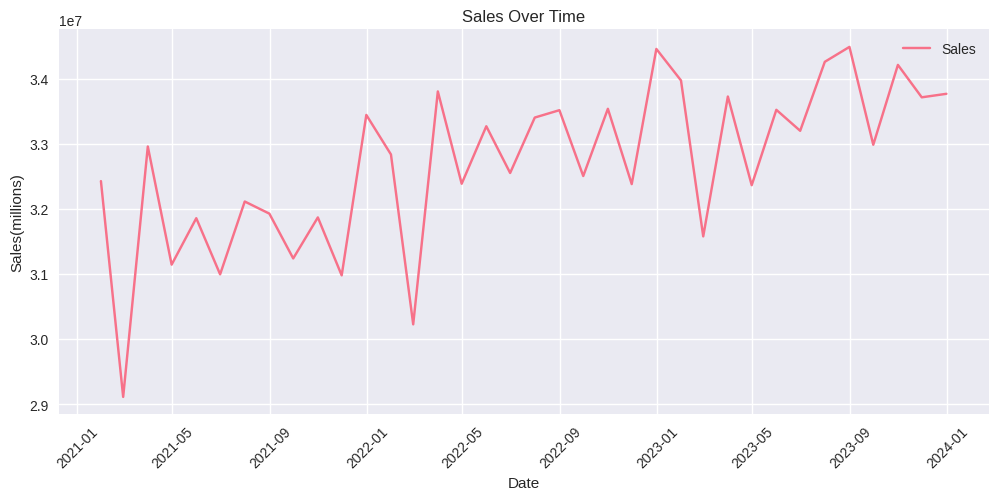

In [43]:
# ploting monthly sales in a line graph
plt.figure(figsize=(12, 5))
plt.plot(dfA['Total_Price'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales(millions)')
plt.title('Sales Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [44]:
from statsmodels.tsa.stattools import adfuller #Import adfuller
# Checking stationarity using Augmented Dickey-Fuller test
result = adfuller(dfA['Total_Price'].dropna())  # Run the test

# Print ADF Statistic and p-value
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpretation of the result
if result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05).")
else:
    print("The time series is not stationary (p-value >= 0.05).")

ADF Statistic: -0.7893343356011617
p-value: 0.8222349672084716
The time series is not stationary (p-value >= 0.05).


In [45]:
# Shiftting data to make it stationary. --first attempt
dfA['Total_Price_firstdiff']=dfA['Total_Price']-dfA['Total_Price'].shift(1)
dfA.head(10)

,Total_Price,Total_Price_firstdiff
Order_Date,,
2021-01-31,32425429.08,NaN
2021-02-28,29110169.14,-3315259.94
2021-03-31,32957436.50,3847267.36
2021-04-30,31142058.64,-1815377.86
2021-05-31,31855490.12,713431.48
2021-06-30,30993287.36,-862202.76
2021-07-31,32112059.34,1118771.98
2021-08-31,31925599.31,-186460.03
2021-09-30,31237668.17,-687931.14


In [46]:
#Checking the result of shifting data by 1 with adfuller test
result1 = adfuller(dfA['Total_Price_firstdiff'].dropna())
print("ADF Statistic:", result1[0])
print("p-value:", result1[1])
if result1[1] < 0.05:
    print("The time series is stationary (p-value < 0.05).")
else:
    print("The time series is not stationary (p-value >= 0.05).")

ADF Statistic: -2.3650478244918665
p-value: 0.15184532387328908
The time series is not stationary (p-value >= 0.05).


In [47]:
# Second difference by addint one more shift to the previously executed data
dfA['Total_Price_seconddiff'] = dfA['Total_Price_firstdiff'].diff().dropna()

# Run ADF test
result2 = adfuller(dfA['Total_Price_seconddiff'].dropna())
print("ADF Statistic (2nd diff):", result2[0])
print("p-value:", result2[1])
print("Critical Values:", result2[4])
if result2[1] < 0.05:
    print("The 2nd differenced series is stationary (p-value < 0.05).")
else:
    print("The 2nd differenced series is not stationary (p-value >= 0.05).")

ADF Statistic (2nd diff): -2.1794436381796123
p-value: 0.21379063774490398
Critical Values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}
The 2nd differenced series is not stationary (p-value >= 0.05).


In [48]:
# Seasonal difference (lag=12)
dfA['Total_Price_seasondiff'] = dfA['Total_Price'] - dfA['Total_Price'].shift(12)
df_seasondiff = dfA['Total_Price_seasondiff'].dropna()

# Run ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_seasondiff)
print("ADF Statistic (seasonal diff):", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[1] < 0.05:
    print("The seasonally differenced series is stationary (p-value < 0.05).")
else:
    print("The seasonally differenced series is not stationary (p-value >= 0.05).")

ADF Statistic (seasonal diff): -1.3108709703556056
p-value: 0.624184272317823
Critical Values: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
The seasonally differenced series is not stationary (p-value >= 0.05).


In [49]:
# Seasonal difference (lag=12)
dfA['Total_Price_seasondiff'] = dfA['Total_Price'] - dfA['Total_Price'].shift(12)

# Then apply first difference (lag=1) to the seasonally differenced series
dfA['Total_Price_season_firstdiff'] = dfA['Total_Price_seasondiff'].diff().dropna()

# Run ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(dfA['Total_Price_season_firstdiff'].dropna())
print("ADF Statistic (seasonal + first diff):", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[1] < 0.05:
    print("The combined differenced series is stationary (p-value < 0.05).")
else:
    print("The combined differenced series is not stationary (p-value >= 0.05).")

ADF Statistic (seasonal + first diff): -3.8936310406349492
p-value: 0.002082222339202885
Critical Values: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
The combined differenced series is stationary (p-value < 0.05).


Length of differenced series: 23


<Figure size 1200x400 with 0 Axes>

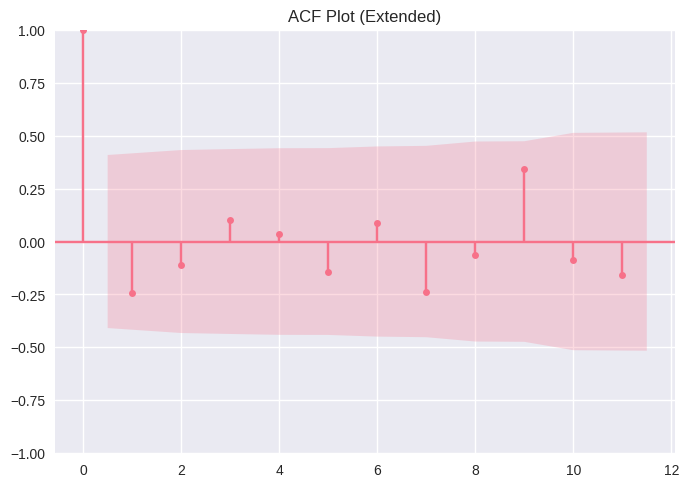

<Figure size 1200x400 with 0 Axes>

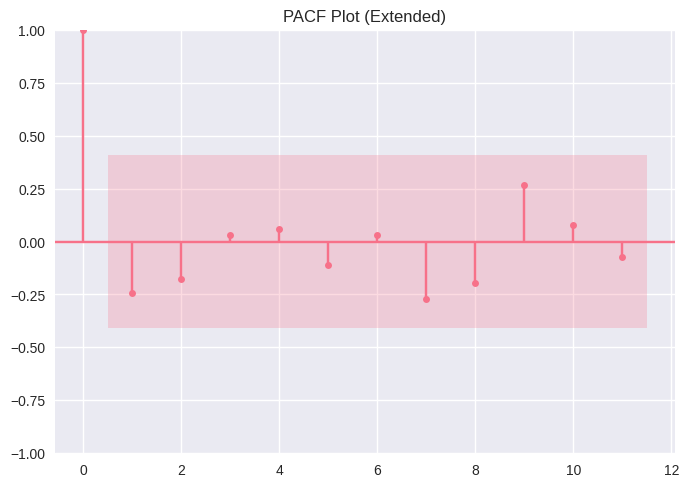

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check the length of your series
print("Length of differenced series:", len(dfA['Total_Price_season_firstdiff'].dropna()))

# Set lags to include seasonal period (12) and a few more
max_lags = min(24, len(dfA['Total_Price_season_firstdiff'].dropna()) // 2)  # Ensure < 50% of length

# ACF plot
plt.figure(figsize=(12, 4))
plot_acf(dfA['Total_Price_season_firstdiff'].dropna(), lags=max_lags)
plt.title('ACF Plot (Extended)')
plt.show()

# PACF plot
plt.figure(figsize=(12, 4))
plot_pacf(dfA['Total_Price_season_firstdiff'].dropna(), lags=max_lags)
plt.title('PACF Plot (Extended)')
plt.show()

In [51]:
import statsmodels.api as sm
#done log atransform to remove varience and make it more stationary
dfA['Log_Total_Price'] = np.log(dfA['Total_Price'])
# Fit SARIMA(0,1,0)(0,1,0,12) - no AR or MA terms, just differencing
model = sm.tsa.SARIMAX(dfA['Log_Total_Price'],
                       order=(0, 1, 0),              # p=0, d=1, q=0
                       seasonal_order=(0, 1, 0, 12)) # P=0, D=1, Q=0, s=12
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    Log_Total_Price   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  58.313
Date:                            Thu, 06 Mar 2025   AIC                           -114.627
Time:                                    04:41:21   BIC                           -113.491
Sample:                                01-31-2021   HQIC                          -114.341
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   6.83e-05      5.380      0.000       0.000       0.001
Ljung-Box (L1) (Q):                

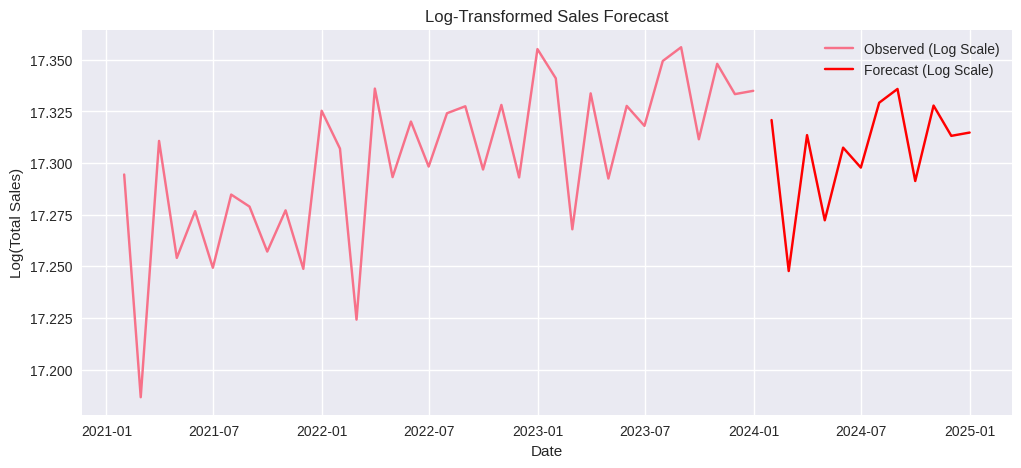

Forecasted Total Sales (original scale):
2024-01-31    3.329222e+07
2024-02-29    3.094450e+07
2024-03-31    3.305017e+07
2024-04-30    3.171488e+07
2024-05-31    3.285014e+07
2024-06-30    3.253419e+07
2024-07-31    3.357279e+07
2024-08-31    3.379723e+07
2024-09-30    3.232369e+07
2024-10-31    3.352636e+07
2024-11-30    3.303829e+07
2024-12-31    3.309108e+07
Freq: ME, Name: predicted_mean, dtype: float64


In [52]:
# Forecast 12 months ahead
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

# Create date index for forecast
last_date = dfA.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='ME')[1:]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(dfA['Log_Total_Price'], label='Observed (Log Scale)')
plt.plot(forecast_index, forecast, label='Forecast (Log Scale)', color='red')
plt.title('Log-Transformed Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Log(Total Sales)')
plt.legend()
plt.show()

# Convert forecast back to original scale (exponential)
forecast_original = np.exp(forecast)
print("Forecasted Total Sales (original scale):")
print(pd.Series(forecast_original, index=forecast_index))

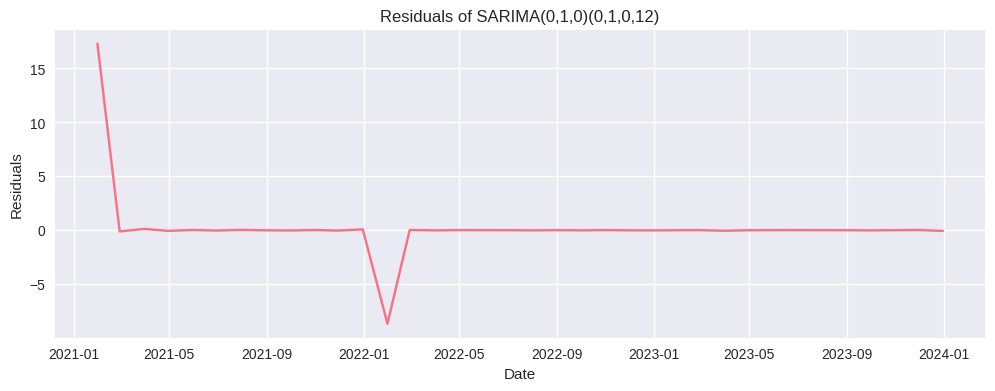

In [53]:
## ploting residual for the final SARIMA (0, 1, 0)(0, 1, 0, 12)
residuals = results.resid  # From your fitted SARIMA(0,1,0)(0,1,0,12) model
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals of SARIMA(0,1,0)(0,1,0,12)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

Order_Date
2022-09-30    17.296863
2022-10-31    17.328148
2022-11-30    17.293045
2022-12-31    17.355198
Freq: ME, Name: Log_Total_Price, dtype: float64
Order_Date
2022-09-30    32503656.55
2022-10-31    33536594.33
2022-11-30    32379794.64
2022-12-31    34456160.95
Freq: ME, Name: Total_Price, dtype: float64


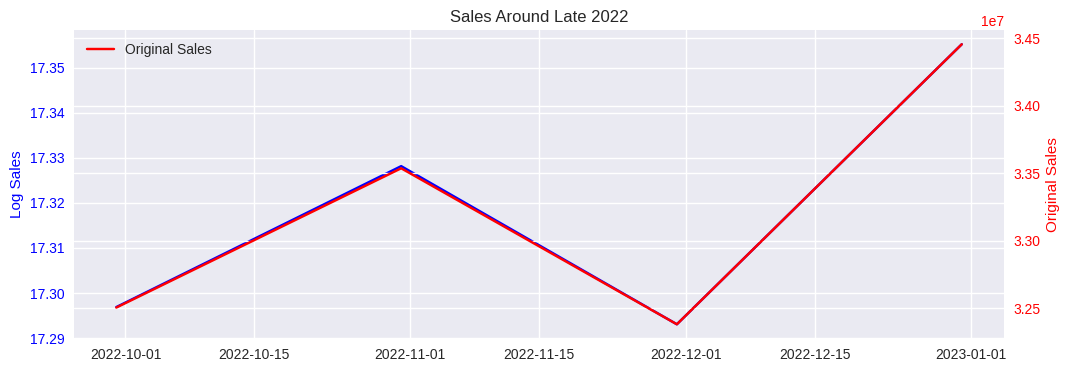

In [54]:
# Check the log-transformed and original data around late 2022
print(dfA['Log_Total_Price']['2022-09-30':'2022-12-31'])
print(dfA['Total_Price']['2022-09-30':'2022-12-31'])

# Optionally, plot this period

# Plotting with two y-axes
plt.figure(figsize=(12, 4))
ax1 = plt.gca()  # Primary axis for Log_Total_Price
ax2 = ax1.twinx()  # Secondary axis for Total_Price

# Plot Log_Total_Price on primary y-axis
ax1.plot(dfA['Log_Total_Price']['2022-09-30':'2022-12-31'], label='Log Sales', color='blue')
ax1.set_ylabel('Log Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Total_Price on secondary y-axis
ax2.plot(dfA['Total_Price']['2022-09-30':'2022-12-31'], label='Original Sales', color='red')
ax2.set_ylabel('Original Sales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Sales Around Late 2022')
plt.xlabel('Date')
plt.legend()
plt.show()

In [55]:
# Create dummy for Dec 2022
dfA['Dec_2022_dummy'] = (dfA.index.month == 12) & (dfA.index.year == 2022)
dfA['Dec_2022_dummy'] = dfA['Dec_2022_dummy'].astype(int)

# Fit model with dummy
model = sm.tsa.SARIMAX(dfA['Log_Total_Price'],
                       order=(0, 1, 0),
                       seasonal_order=(0, 1, 0, 12),
                       exog=dfA['Dec_2022_dummy'])
results = model.fit()
print(results.summary())

# Re-forecast with the updated model

# Assuming 'df' and 'results' are already defined from your SARIMA fit
forecast_steps = 12
forecast_index = pd.date_range(start=dfA.index[-1], periods=forecast_steps + 1, freq='ME')[1:]  # Use 'ME' for Month-End
exog_forecast = pd.Series(0, index=forecast_index)  # 12 zeros for 12 months

# Re-forecast with the updated model
forecast = results.forecast(steps=forecast_steps, exog=exog_forecast)
forecast_original = np.exp(forecast)
print("Forecasted Total Sales (original scale, with Dec 2022 dummy):")
print(pd.Series(forecast_original, index=forecast_index))

                                     SARIMAX Results                                      
Dep. Variable:                    Log_Total_Price   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  59.141
Date:                            Thu, 06 Mar 2025   AIC                           -114.282
Time:                                    04:41:35   BIC                           -112.011
Sample:                                01-31-2021   HQIC                          -113.711
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Dec_2022_dummy     0.0140      0.007      2.109      0.035       0.001       0.027
sigma2             0.00

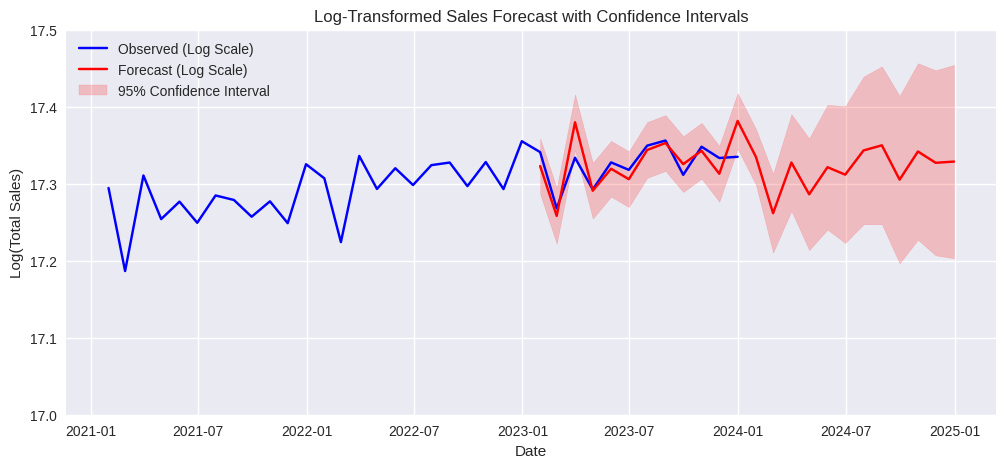

Forecasted Total Sales (original scale, Jan 2024 - Dec 2024):
                    Mean  Lower 95% CI  Upper 95% CI
2024-01-31  3.376117e+07  3.255960e+07  3.500708e+07
2024-02-29  3.138039e+07  2.981267e+07  3.303055e+07
2024-03-31  3.351571e+07  3.147667e+07  3.568685e+07
2024-04-30  3.216161e+07  2.991307e+07  3.457918e+07
2024-05-31  3.331287e+07  3.071990e+07  3.612470e+07
2024-06-30  3.299247e+07  3.019004e+07  3.605503e+07
2024-07-31  3.404569e+07  3.093302e+07  3.747159e+07
2024-08-31  3.427330e+07  3.093435e+07  3.797265e+07
2024-09-30  3.277901e+07  2.940225e+07  3.654357e+07
2024-10-31  3.399861e+07  3.031740e+07  3.812681e+07
2024-11-30  3.350367e+07  2.970940e+07  3.778251e+07
2024-12-31  3.355720e+07  2.959826e+07  3.804566e+07


In [56]:
# Assuming 'results', 'df', and 'forecast_index' are defined
forecast_steps = 12
forecast_index = pd.date_range(start=dfA.index[-1], periods=forecast_steps + 1, freq='ME')[1:]
exog_forecast = pd.Series(0, index=forecast_index)

# Get prediction with confidence intervals
pred = results.get_prediction(start=len(dfA) - 12, end=len(dfA) + 11, exog=exog_forecast)
pred_ci = pred.conf_int()

# Plot with correct y-axis scale for log-transformed data
plt.figure(figsize=(12, 5))
plt.plot(dfA['Log_Total_Price'], label='Observed (Log Scale)', color='blue')
plt.plot(pred_ci.index, pred.predicted_mean, label='Forecast (Log Scale)', color='red')  # Use pred.predicted_mean directly
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Log-Transformed Sales Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Log(Total Sales)')
plt.ylim(17.0, 17.5)  # Set y-axis limits to match your log scale (~17.2 to 17.35)
plt.legend()
plt.show()

# Print forecast in original scale with confidence intervals
forecast_mean = np.exp(pred.predicted_mean[-forecast_steps:])
forecast_lower = np.exp(pred_ci.iloc[-forecast_steps:, 0])
forecast_upper = np.exp(pred_ci.iloc[-forecast_steps:, 1])

print("Forecasted Total Sales (original scale, Jan 2024 - Dec 2024):")
print(pd.DataFrame({
    'Mean': forecast_mean,
    'Lower 95% CI': forecast_lower,
    'Upper 95% CI': forecast_upper
}, index=forecast_index))




In [57]:
forecast_df = pd.DataFrame({
    'Mean': forecast_mean,
    'Lower 95% CI': forecast_lower,
    'Upper 95% CI': forecast_upper
}, index=forecast_index)
forecast_df.to_csv('forecasted_sales_2024.csv')
print('saved as forecasted_sales_2024.csv')

saved as forecasted_sales_2024.csv


Actual Original Scale Sample (Millions):
Order_Date
2021-01-31    32.425429
2021-02-28    29.110169
2021-03-31    32.957437
2021-04-30    31.142059
2021-05-31    31.855490
Freq: ME, Name: Log_Total_Price, dtype: float64

Predicted Original Scale Sample (Millions):
Order_Date
2021-01-31    32.425429
2021-02-28    32.425428
2021-03-31    31.637272
2021-04-30    30.081096
2021-05-31    31.556983
Freq: ME, Name: predicted_mean, dtype: float64

Model Performance Metrics (Original Scale, Millions):
MAE (Mean Absolute Error): $0.75M
MSE (Mean Squared Error): $1.02T (or $1019176.88M^2)
RMSE (Root Mean Squared Error): $1.01M
MAPE (Mean Absolute Percentage Error): 2.32%


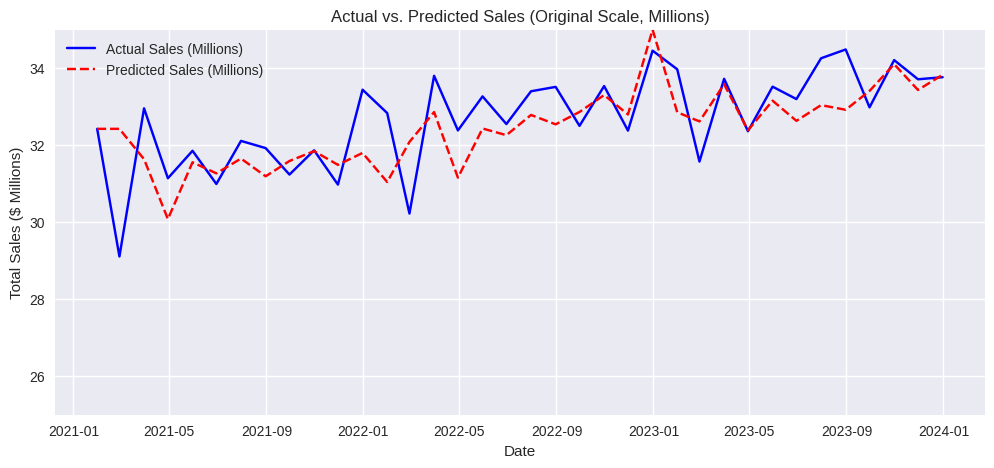

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Updated import for ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'dfA' is the resampled monthly DataFrame from previous cells
# If not already done, ensure 'Log_Total_Price' exists (log transformation)
dfA['Log_Total_Price'] = np.log(dfA['Total_Price'])

# Add the exogenous dummy variable for December 2022
dfA['Dec_2022_dummy'] = (dfA.index.month == 12) & (dfA.index.year == 2022)
dfA['Dec_2022_dummy'] = dfA['Dec_2022_dummy'].astype(int)

# Fit an ARIMA model (e.g., ARIMA(1,1,1) with exogenous variable)
# Replace (1,1,1) with your actual p, d, q values if known
model = ARIMA(dfA['Log_Total_Price'], exog=dfA['Dec_2022_dummy'], order=(1, 1, 1))
results = model.fit()

# Get in-sample predictions
pred = results.get_prediction(start=0, end=len(dfA) - 1, exog=dfA['Dec_2022_dummy'])
predicted_mean = pred.predicted_mean

# Handle NaN or zero in the first prediction
if pd.isna(predicted_mean.iloc[0]) or predicted_mean.iloc[0] == 0:
    predicted_mean.iloc[0] = dfA['Log_Total_Price'].iloc[0]  # Use actual log value for Jan 2021

# Get actual values
actual_log = dfA['Log_Total_Price']
actual_original = np.exp(actual_log)  # Exponentiate to original scale (millions)
predicted_original = np.exp(predicted_mean)  # Exponentiate to original scale

# Verify scaling (in millions)
print("Actual Original Scale Sample (Millions):")
print(actual_original.head() / 1e6)
print("\nPredicted Original Scale Sample (Millions):")
print(predicted_original.head() / 1e6)

# Calculate errors in original scale (millions)
mae_original = mean_absolute_error(actual_original, predicted_original)
mse_original = mean_squared_error(actual_original, predicted_original)
rmse_original = np.sqrt(mse_original)

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Calculate MAPE
mape_original = mean_absolute_percentage_error(actual_original, predicted_original)

# Print results explicitly
print("\nModel Performance Metrics (Original Scale, Millions):")
print(f"MAE (Mean Absolute Error): ${mae_original / 1e6:.2f}M")
print(f"MSE (Mean Squared Error): ${mse_original / 1e12:.2f}T (or ${mse_original / 1e6:.2f}M^2)")
print(f"RMSE (Root Mean Squared Error): ${rmse_original / 1e6:.2f}M")
print(f"MAPE (Mean Absolute Percentage Error): {mape_original:.2f}%")

# Plot with correct scaling (millions)
plt.figure(figsize=(12, 5))
plt.plot(dfA.index, actual_original / 1e6, label='Actual Sales (Millions)', color='blue')
plt.plot(dfA.index, predicted_original / 1e6, label='Predicted Sales (Millions)', color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales (Original Scale, Millions)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($ Millions)')
plt.legend()
plt.ylim(25, 35)  # Match the data range (~29M to ~34.5M)
plt.show()

# Chronos Model Develoment and Evaluation

### Data Preprocessing for Chronos Time Series Analysis

In [60]:
dfc = df.copy() # Call the copy() function to create a new DataFrame
dfc.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Year-Month,Year,is_duplicate
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-WÃ¼rttemberg,2023-08-23,2023-08,2023,False


In [61]:
print(dfc.dtypes)

Order_ID                 object
Customer_ID              object
Customer_Type            object
Product                  object
Category                 object
Unit_Price              float64
Quantity                  int64
Discount                float64
Total_Price             float64
Region                   object
Order_Date       datetime64[ns]
Year-Month               object
Year                     object
is_duplicate               bool
dtype: object


In [62]:
# prompt: diplay first 10 Order_Date

print(aggregated_df['Order_Date'].head(10))


0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
5   2021-01-06
6   2021-01-07
7   2021-01-08
8   2021-01-09
9   2021-01-10
Name: Order_Date, dtype: datetime64[ns]


In [63]:
print(dfc.dtypes)
# Set it as index


Order_ID                 object
Customer_ID              object
Customer_Type            object
Product                  object
Category                 object
Unit_Price              float64
Quantity                  int64
Discount                float64
Total_Price             float64
Region                   object
Order_Date       datetime64[ns]
Year-Month               object
Year                     object
is_duplicate               bool
dtype: object


In [64]:
# Set it as index
dfc.set_index('Order_Date', inplace=True)

In [65]:
print(dfc.dtypes)

Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Year-Month        object
Year              object
is_duplicate        bool
dtype: object


In [66]:
# Drop unnecessary columns
dfc = dfc.drop(columns=['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Unit_Price', 'Quantity', 'Discount', 'Region'], errors='ignore')

# Print the first few rows to confirm changes
print(df.head())
df.info()


  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price              Region Order_Date  \
0        1.66        53      0.10        79.18  Baden-WÃ¼rttemberg 2023-08-23   
1        1.56        90      0.10       126.36  Baden-WÃ¼rttemberg 2023-08-23   
2        1.17        73      0.05        81.14  Baden-WÃ¼rttemberg 2023-08-23   
3        3.22        59      0.10       170.98  Baden-WÃ¼rttemberg 2023-08-23   
4        0.87        35      0.10        27.40  Baden-WÃ¼rttemberg 2023-08-23   

  Year-Month  Year  is_duplicate  
0    2023-08  2023         False  
1   

In [67]:
# Ensure the DataFrame is sorted by date in ascending order
dfc = dfc.sort_index()
print(type(dfc.index))  # Check what type the index is
print(dfc.index[:5])  # Print first 5 values of the index

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', name='Order_Date', freq=None)


In [68]:
# Aggregate data to ensure only one value per day (e.g., sum of Total_Price per day)
dfc = dfc.groupby('Order_Date').agg({'Total_Price': 'sum'})

# Print to check the fix
print(dfc.head())  # Should show only one row per day
dfc = dfc.sort_index()
dfc = dfc.asfreq('D')

            Total_Price
Order_Date             
2021-01-01    987429.55
2021-01-02   1067311.95
2021-01-03    964076.37
2021-01-04   1033108.49
2021-01-05   1083223.79


In [69]:
# Check if frequency is set correctly
print(dfc.index.freq)  # Should return 'D'
print(type(dfc.index))  # Should return <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

<Day>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [70]:
print(dfc.index.freq)  # Should return 'D'
print(dfc.head())  # Should now show a clean daily time series
print(dfc.index.is_monotonic_increasing)  # Should return True or False
print(dfc.index[:5])  # First 5 dates
print(dfc.index[-5:])  # Last 5 dates
dfc = dfc.sort_index()
print(dfc.index.is_monotonic_increasing)  # Should return True

<Day>
            Total_Price
Order_Date             
2021-01-01    987429.55
2021-01-02   1067311.95
2021-01-03    964076.37
2021-01-04   1033108.49
2021-01-05   1083223.79
True
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', name='Order_Date', freq='D')
DatetimeIndex(['2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30'],
              dtype='datetime64[ns]', name='Order_Date', freq='D')
True


## Chronos Model Development

In [71]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import numpy as np
from chronos import ChronosPipeline

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-eq4egs4r
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-eq4egs4r
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 94e20ea7e510ac4d665492b8bed8836a5143f16e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

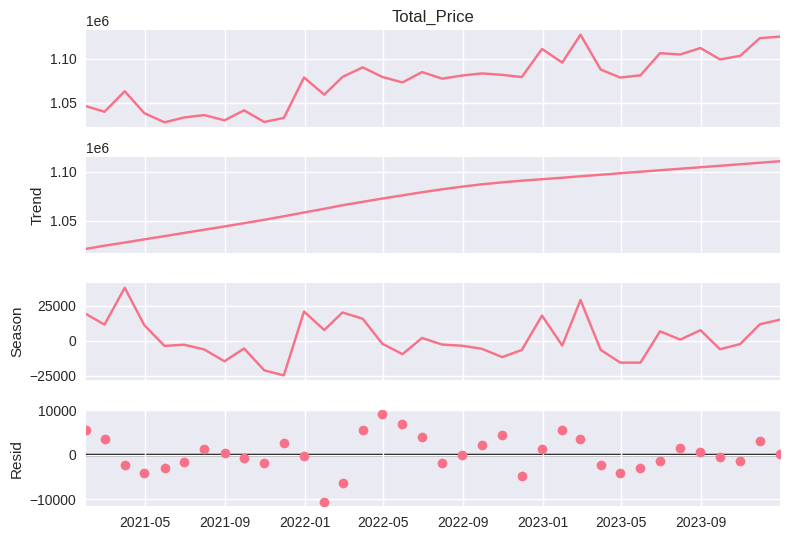

            Total_Price
Order_Date             
2021-01-01    987429.55
2021-01-02   1067311.95
2021-01-03    964076.37
2021-01-04   1033108.49
2021-01-05   1083223.79
            Total_Price
Order_Date             
2023-12-26   1061194.29
2023-12-27   1150206.36
2023-12-28   1203390.15
2023-12-29   1085887.49
2023-12-30   1039027.36
Is index monotonic increasing? True
Index frequency: <Day>


In [72]:

# Extract the series
series = dfc['Total_Price']
series = series.resample('ME').mean()  # Resample to monthly frequency

# Apply STL decomposition for visualizing the data
stl = STL(series, seasonal=13, period=12)  # Monthly data with yearly seasonality
result = stl.fit()

# Plot the results
result.plot()
plt.show()

# Remove duplicates and aggregate daily Total_Price (if any)
dfc = dfc.groupby('Order_Date').agg({'Total_Price': 'sum'})

# Sort the index in ascending order
dfc = dfc.sort_index()

# Print to check
print(dfc.head())  # First 5 rows
print(dfc.tail())  # Last 5 rows

# Ensure no zero or negative values (important for multiplicative model)
dfc['Total_Price'] = dfc['Total_Price'].apply(lambda x: max(x, 0.01))

# Set daily frequency
dfc = dfc.asfreq('D')

# Confirm that index is properly set
print("Is index monotonic increasing?", dfc.index.is_monotonic_increasing)  # Should be True
print("Index frequency:", dfc.index.freq)  # Should return 'D'



In [73]:
# Fit the model with manually set smoothing parameters
model_multiplicative = ExponentialSmoothing(
    dfc, seasonal='mul', seasonal_periods=12, trend='add'
).fit(
    smoothing_level=0.2,
    smoothing_trend=0.1,
    smoothing_seasonal=0.1,
    optimized=False
)

# Forecast next 30 days
forecast_multiplicative = model_multiplicative.forecast(30)

# Print forecast results
print(forecast_multiplicative)
print(model_multiplicative.summary())

2023-12-31    1.149921e+06
2024-01-01    1.125272e+06
2024-01-02    1.105730e+06
2024-01-03    1.129409e+06
2024-01-04    1.121668e+06
2024-01-05    1.140753e+06
2024-01-06    1.118310e+06
2024-01-07    1.108168e+06
2024-01-08    1.121527e+06
2024-01-09    1.120134e+06
2024-01-10    1.127245e+06
2024-01-11    1.120985e+06
2024-01-12    1.142746e+06
2024-01-13    1.118247e+06
2024-01-14    1.098824e+06
2024-01-15    1.122351e+06
2024-01-16    1.114654e+06
2024-01-17    1.133616e+06
2024-01-18    1.111311e+06
2024-01-19    1.101228e+06
2024-01-20    1.114500e+06
2024-01-21    1.113111e+06
2024-01-22    1.120175e+06
2024-01-23    1.113950e+06
2024-01-24    1.135571e+06
2024-01-25    1.111222e+06
2024-01-26    1.091917e+06
2024-01-27    1.115292e+06
2024-01-28    1.107641e+06
2024-01-29    1.126480e+06
Freq: D, dtype: float64
                       ExponentialSmoothing Model Results                       
Dep. Variable:              Total_Price   No. Observations:                 1094
Mode

In [75]:
# Split data into training and test sets before using train_dfc in ExponentialSmoothing
prediction_length = 180  # Adjust as needed
train_dfc = dfc.iloc[:len(dfc) - prediction_length]
test_dfc = dfc.iloc[len(dfc) - prediction_length:]

# Fit the Holt-Winters Additive Model
model_additive = ExponentialSmoothing(
    train_dfc,  # Now train_dfc is defined
    seasonal='add',  # Additive seasonality
    seasonal_periods=12,  # 12 months for yearly seasonality
    trend='add'  # Additive trend
).fit(
    smoothing_level=0.2,
    smoothing_trend=0.1,
    smoothing_seasonal=0.1,
    optimized=False  # Avoids the convergence issue
)
# Forecast next 30 days
forecast_additive = model_additive.forecast(30)
print(forecast_additive)
print(model_additive.summary())

2023-07-04    1.108170e+06
2023-07-05    1.076909e+06
2023-07-06    1.091708e+06
2023-07-07    1.081363e+06
2023-07-08    1.092861e+06
2023-07-09    1.072664e+06
2023-07-10    1.067094e+06
2023-07-11    1.074506e+06
2023-07-12    1.079078e+06
2023-07-13    1.089005e+06
2023-07-14    1.072500e+06
2023-07-15    1.054679e+06
2023-07-16    1.093421e+06
2023-07-17    1.062160e+06
2023-07-18    1.076959e+06
2023-07-19    1.066615e+06
2023-07-20    1.078112e+06
2023-07-21    1.057915e+06
2023-07-22    1.052345e+06
2023-07-23    1.059757e+06
2023-07-24    1.064329e+06
2023-07-25    1.074257e+06
2023-07-26    1.057751e+06
2023-07-27    1.039930e+06
2023-07-28    1.078672e+06
2023-07-29    1.047411e+06
2023-07-30    1.062210e+06
2023-07-31    1.051866e+06
2023-08-01    1.063363e+06
2023-08-02    1.043166e+06
Freq: D, dtype: float64
                       ExponentialSmoothing Model Results                       
Dep. Variable:              Total_Price   No. Observations:                  914
Mode

### Trainig and Testing of Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


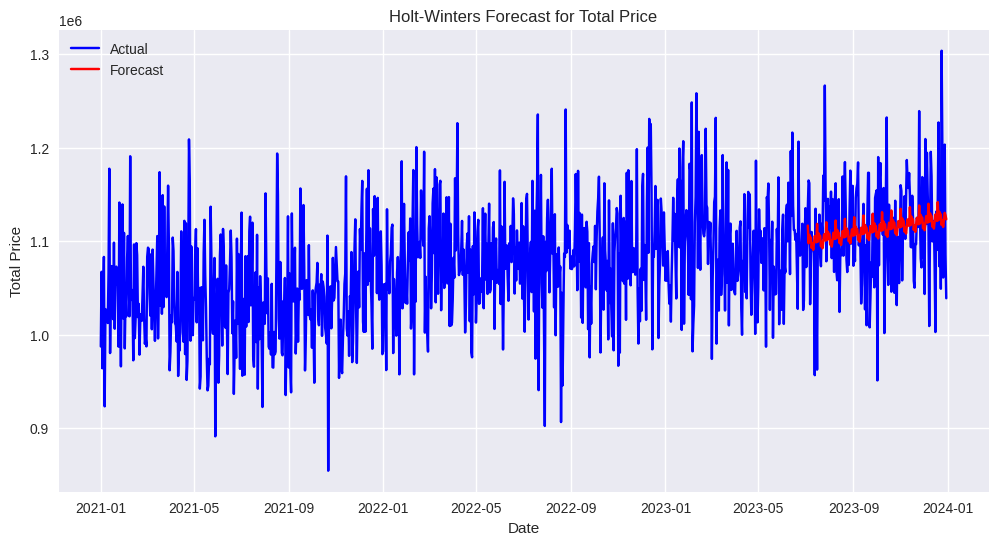

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


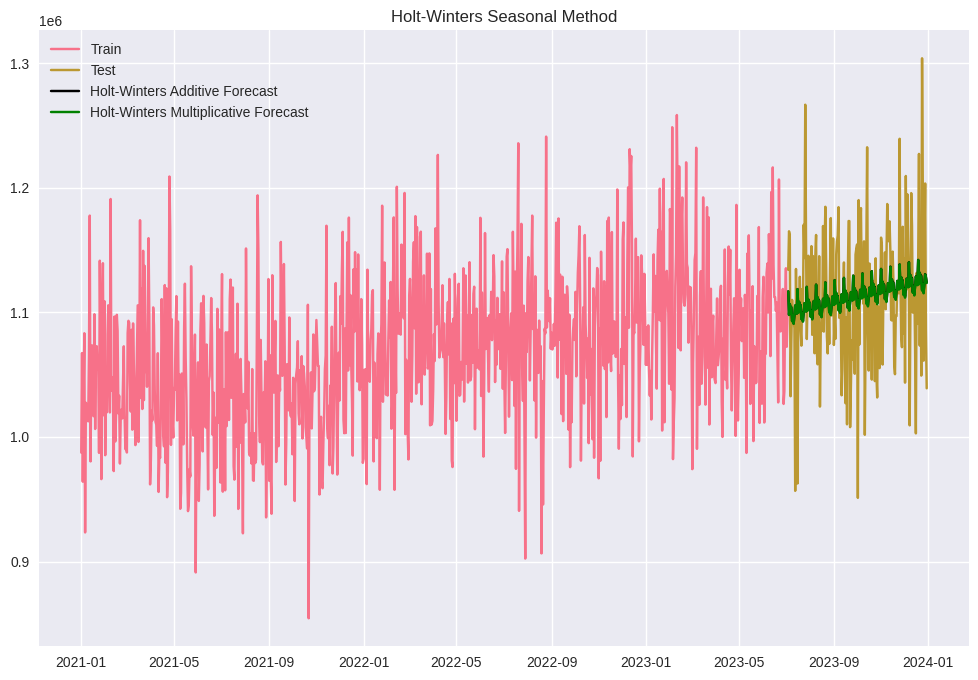

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

torch.Size([914])
tensor([ 987429.5500, 1067311.9500,  964076.3700, 1033108.4900, 1083223.7900,
         923362.8600, 1027440.6800, 1022133.2600, 1021877.4600, 1012512.0100],
       dtype=torch.float64)
tensor([[[1109132.1250, 1157008.3750, 1077214.6250,  ..., 1102506.3750,
          1102506.3750, 1102506.3750],
         [1045297.1875, 1093173.3750, 1133070.1250,  ..., 1078538.8750,
          1086528.1250, 1086528.1250],
         [1164987.7500, 1085194.0000, 1172967.1250,  ..., 1086528.1250,
          1102506.3750, 1094517.2500],
         ...,
         [1117111.5000, 1141049.5000, 1188925.8750,  ..., 1110495.6250,
          1118484.7500, 1118484.7500],
         [1077214.6250, 1117111.5000, 1149029.0000,  ..., 1094517.2500,
          1086528.1250, 1094517.2500],
         [1013379.6875, 1109132.1250, 1157008.3750,  ..., 1110495.6250,
          1110495.6250, 1110495.6250]]])


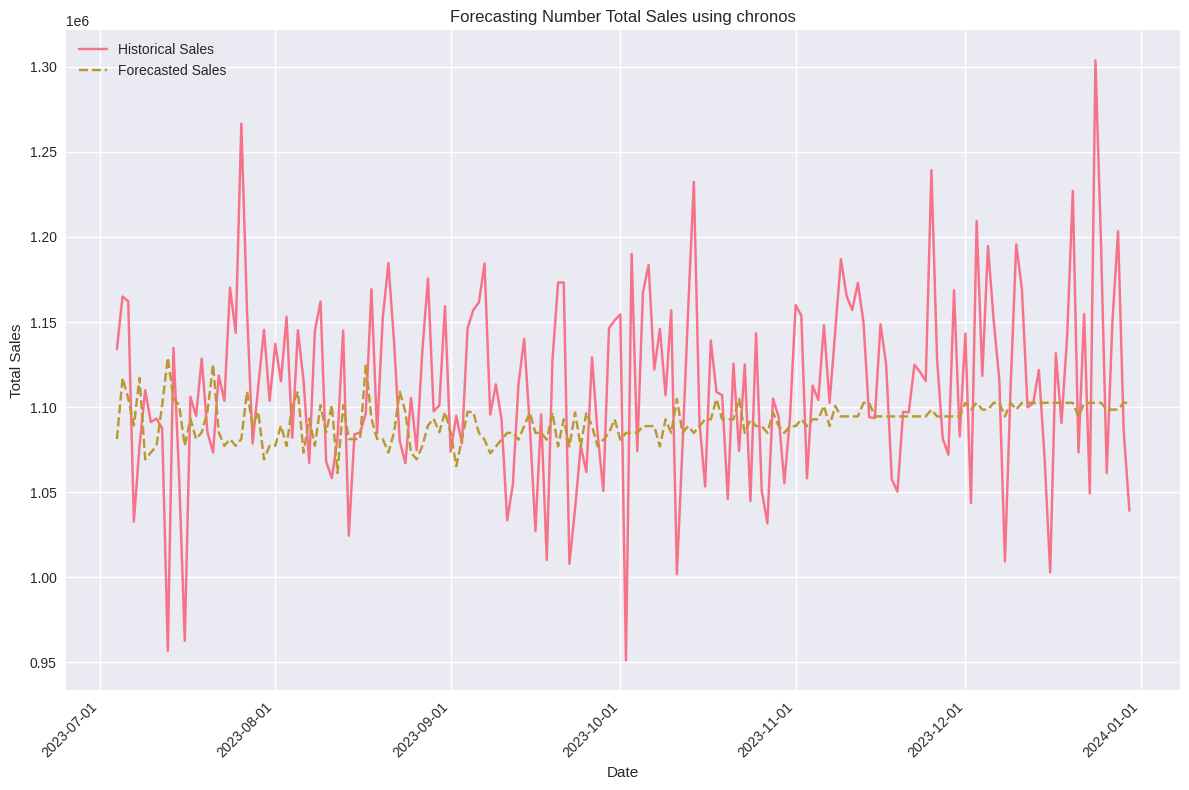

In [76]:
# Split data into training and test sets
prediction_length = 180
train_dfc = dfc.iloc[:len(dfc) - prediction_length]  # Use dfc for consistency
test_dfc = dfc.iloc[len(dfc) - prediction_length:]


# Apply Holt-Winters Exponential Smoothing (multiplicative method)
model_multiplicative = ExponentialSmoothing(train_dfc, seasonal='mul', seasonal_periods=12, trend='add').fit()
forecast_multiplicative = model_multiplicative.forecast(len(test_dfc))

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(dfc.index, dfc['Total_Price'], label="Actual", color='blue')
plt.plot(forecast_multiplicative.index, forecast_multiplicative, label="Forecast", color='red')
plt.title("Holt-Winters Forecast for Total Price")
plt.xlabel("Date")
plt.ylabel("Total Price")
plt.legend()
plt.show()

# Apply Holt-Winters Exponential Smoothing (additive method)
model_additive = ExponentialSmoothing(train_dfc, seasonal='add', seasonal_periods=12, trend='add').fit()
forecast_additive = model_additive.forecast(len(test_dfc))

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_dfc, label='Train')
plt.plot(test_dfc, label='Test')
plt.plot(forecast_additive, label='Holt-Winters Additive Forecast', color="black")
plt.plot(forecast_multiplicative, label='Holt-Winters Multiplicative Forecast', color="green")
plt.legend(loc='best')
plt.title('Holt-Winters Seasonal Method')
plt.show()

# MSE calculations
mse_train_additive = mean_squared_error(train_dfc, model_additive.fittedvalues)
mse_test_additive = mean_squared_error(test_dfc, forecast_additive)
aic_additive = model_additive.aic

mse_train_multiplicative = mean_squared_error(train_dfc, model_multiplicative.fittedvalues)
mse_test_multiplicative = mean_squared_error(test_dfc, forecast_multiplicative)
aic_multiplicative = model_multiplicative.aic


# Load the pre-trained Chronos model
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

prediction_length = 180
train_dfc = dfc.iloc[:len(dfc) - prediction_length]
test_dfc = dfc.iloc[len(dfc) - prediction_length:]

train_dfc.shape
test_dfc.shape

target_variable = torch.tensor(train_dfc.loc[:, "Total_Price"].values)

print(target_variable.shape)  # Confirm tensor shape
print(target_variable[:10])  # Print the first 10 values

forecast = pipeline.predict(target_variable, prediction_length, limit_prediction_length=False)
print(forecast)

median_forecast = np.quantile(forecast[0].numpy(), [0.5], axis=0)
median_forecast_dfc = pd.DataFrame(median_forecast.T, columns=['Total_Sales'])
median_forecast_dfc.to_csv('forecasted_Sales_by_chronos.csv', index=False)

import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
plt.plot(test_dfc.index, test_dfc['Total_Price'], label='Historical Sales')
plt.plot(test_dfc.index, median_forecast_dfc['Total_Sales'][:len(test_dfc)], label='Forecasted Sales', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Forecasting Number Total Sales using chronos')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set major ticks at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date labels
plt.xticks(rotation=45, ha='right')  # Aligns labels slightly to the right (or use 'left' to shift)
plt.tight_layout()
plt.show()



### Model Performance against benchmark

In [77]:
# Model Evaluation (MSE, MAE and AIC)
mean_forecast = np.quantile(forecast[0].numpy(), [0.5], axis=0)
mean_forecast_dfc = pd.DataFrame(mean_forecast.T, columns=['Total_Sales'])

# Ensure forecast and test_dfc have the same length
min_length = min(len(test_dfc), len(mean_forecast_dfc))
test_dfc = test_dfc.iloc[:min_length]
mean_forecast_dfc = mean_forecast_dfc.iloc[:min_length]

# Calculate MSE
mse_chronos = mean_squared_error(test_dfc['Total_Price'], mean_forecast_dfc['Total_Sales'])

# Calculate MAE
mae_chronos = mean_absolute_error(test_dfc['Total_Price'], mean_forecast_dfc['Total_Sales'])

# Calculate AIC
aic_chronos = model_additive.aic



# Print MSE Results
print("\033[2mModel Performance Metrics:\033[0m")
print("-----------------------------")

print('Holt-Winters Method Model Performance Metrics')
print("-----------------------------")
print(f'MSE (Training) - Additive Model: {mse_train_additive:.2f}')
print(f'MSE (Testing) - Additive Model: {mse_test_additive:.2f}')
print(f'AIC (Additive Model): {aic_additive:.2f}')
print("-----------------------------")
print(f'MSE (Training) - Multiplicative Model: {mse_train_multiplicative:.2f}')
print(f'MSE (Testing) - Multiplicative Model: {mse_test_multiplicative:.2f}')
print(f'AIC (Multiplicative Model): {aic_multiplicative:.2f}')
print("-----------------------------")
# Print results
print("Chronos Performance Metrics:")
print("-----------------------------")
print(f'MSE (Chronos Model): {mse_chronos:.2f}')
print("-----------------------------")
print(f'MAE (Chronos Model): {mae_chronos:.2f}')
print("-----------------------------")
print(f'AIC (Chronos Model): {aic_chronos:.2f}')

Model Performance Metrics:
-----------------------------
Holt-Winters Method Model Performance Metrics
-----------------------------
MSE (Training) - Additive Model: 3297144363.97
MSE (Testing) - Additive Model: 2975289281.68
AIC (Additive Model): 20063.52
-----------------------------
MSE (Training) - Multiplicative Model: 3301908769.21
MSE (Testing) - Multiplicative Model: 2975944302.51
AIC (Multiplicative Model): 20064.84
-----------------------------
Chronos Performance Metrics:
-----------------------------
MSE (Chronos Model): 3468418561.34
-----------------------------
MAE (Chronos Model): 46491.64
-----------------------------
AIC (Chronos Model): 20063.52


# **LSTM MODELING**

In [136]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
# Set random seeds for reproducibility
np.random.seed(1234)  # NumPy seed
tf.random.set_seed(1234)  # TensorFlow seed
os.environ['PYTHONHASHSEED'] = '1234'  # Python hash seed

In [138]:
# Use aggregated daily data for LSTM
lstm_data = aggregated_df.copy()

In [139]:
# Prepare time series using raw daily Total_Price
sales_data = lstm_data['Total_Price'].values.reshape(-1, 1)

In [140]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sales_data)

In [141]:
# Create sequences for LSTM
def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

timesteps = 15  # 15-day lookback for daily data
X, y = create_sequences(scaled_data, timesteps)

In [142]:
# Train-test split (70-30)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("LSTM Training shape:", X_train.shape)
print("LSTM Testing shape:", X_test.shape)
print("Number of days in aggregated data:", len(lstm_data))

LSTM Training shape: (755, 15, 1)
LSTM Testing shape: (324, 15, 1)
Number of days in aggregated data: 1094


In [143]:
# Check if X_test is valid
if len(X_test) == 0:
    print("Error: X_test is empty. Reducing timesteps to 7.")
    timesteps = 7
    X, y = create_sequences(scaled_data, timesteps)
    train_size = int(len(X) * 0.7)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    print("New LSTM Training shape:", X_train.shape)
    print("New LSTM Testing shape:", X_test.shape)

In [144]:
# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [145]:
# Build and train LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(timesteps, 1)),  # Define input shape explicitly
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.1433 - val_loss: 0.0171
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0190 - val_loss: 0.0151
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0169 - val_loss: 0.0152
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0163 - val_loss: 0.0154
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0162 - val_loss: 0.0153
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - val_loss: 0.0153
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.

In [146]:
# Debug: Check model type
print("LSTM Model type:", type(lstm_model))

LSTM Model type: <class 'keras.src.models.sequential.Sequential'>


In [147]:
# Forecast
last_sequence = scaled_data[-timesteps:]
future_predictions = []
n_future_days = 365  # Forecast 365 days for 2024
current_sequence = last_sequence.copy()

for _ in range(n_future_days):
    current_sequence_reshaped = current_sequence.reshape((1, timesteps, 1))
    next_pred = lstm_model.predict(current_sequence_reshaped, verbose=0)
    future_predictions.append(next_pred[0, 0])
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_pred[0, 0]

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions_inv = scaler.inverse_transform(future_predictions)

In [148]:
# Predict on test set for visualization
if len(X_test) > 0:
    y_test_pred = lstm_model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [149]:
# Evaluate - Compute MAE and MSE on the full dataset
X_full = X.reshape((X.shape[0], X.shape[1], 1))
y_full_pred = lstm_model.predict(X_full)
mae = mean_absolute_error(scaler.inverse_transform(y), scaler.inverse_transform(y_full_pred))
mse = mean_squared_error(scaler.inverse_transform(y), scaler.inverse_transform(y_full_pred))

print("\nLSTM Model Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

LSTM Model Performance Metrics:
MAE: 44787.93
MSE: 3201502053.17


In [150]:
# Define future dates
last_date = lstm_data['Order_Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future_days, freq='D')


Exact Predicted Values for 2024 (Monthly):
2023-12: $1121440.50
2024-01: $34215080.00
2024-02: $31509828.00
2024-03: $33552246.00
2024-04: $32437026.00
2024-05: $33509950.00
2024-06: $32426986.00
2024-07: $33507382.00
2024-08: $33507256.00
2024-09: $32426350.00
2024-10: $33507218.00
2024-11: $32426340.00
2024-12: $31345462.00


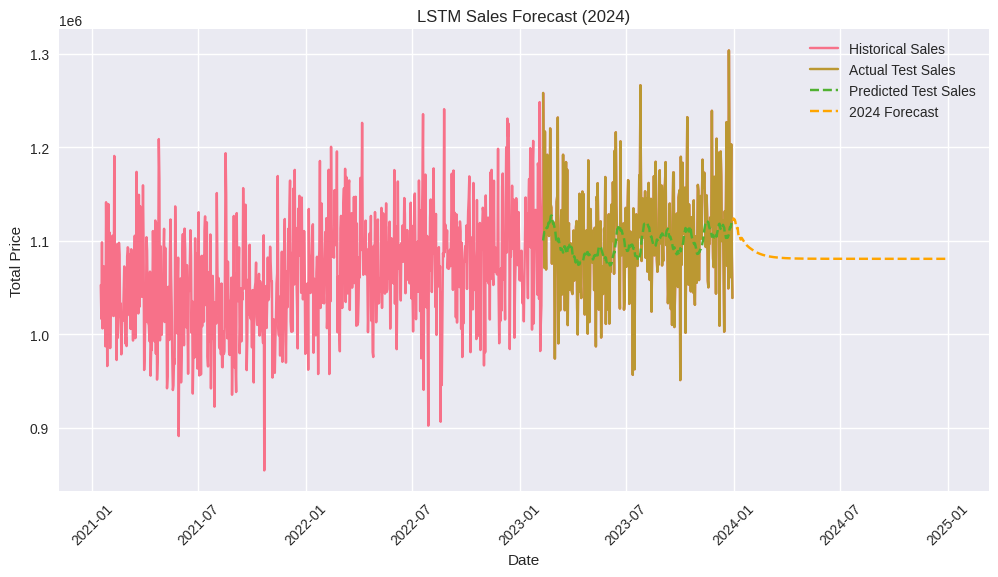

In [151]:
# Visualization
plt.figure(figsize=(12, 6))

# Aggregate daily predictions into monthly sums for 2024
future_df = pd.DataFrame({'Date': future_dates, 'Total_Price': future_predictions_inv.flatten()})
future_df['Year-Month'] = future_df['Date'].dt.to_period('M').astype(str)
monthly_predictions = future_df.groupby('Year-Month')['Total_Price'].sum().reset_index()

# Display exact predicted values for each month of 2024
print("\nExact Predicted Values for 2024 (Monthly):")
for index, row in monthly_predictions.iterrows():
    print(f"{row['Year-Month']}: ${row['Total_Price']:.2f}")

plt.plot(lstm_data['Order_Date'][timesteps:], scaler.inverse_transform(scaled_data[timesteps:]), label='Historical Sales')
if len(X_test) > 0:
    plt.plot(lstm_data['Order_Date'][timesteps + train_size:], scaler.inverse_transform(y_test), label='Actual Test Sales')
    plt.plot(lstm_data['Order_Date'][timesteps + train_size:], scaler.inverse_transform(y_test_pred), label='Predicted Test Sales', linestyle='--')
plt.plot(future_dates, future_predictions_inv, label='2024 Forecast', linestyle='--', color='orange')
plt.title('LSTM Sales Forecast (2024)')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
